### Model Evaluation & Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings(action='ignore')

d_set = load_digits()
X , y =d_set.data , d_set.target

# np.bincount1차원 배열과 양의 정수형인 객체에 적용합니다.객체의 원소중 0부터 최대값 범위의 정수값을 올림차순으로 정리한 뒤 각 원소에 대한 빈도수를 반환
for class_name , class_count in zip(d_set.target_names, np.bincount(d_set.target)):
                                    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [7]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

더미분류기의 정확도와 근접한 정확도를 갖는다면 그것은 클래스가 매우 불균형하기 때문 or 의미있는 정확도를 획득하기 위한 충분한 표본을 
사용하지 못해서이다.일반적으로 불균형 분류 문제에서는  정확도 이외의 측정법을 사용해야 한다. 
AUC, AUROC는 area under the ROC (receiver operating characteristic) curve의 약어입니다. ROC(Receiver Operating Characteristic) 모든 임계값에서 분류모델의 성능을 보여주는 그래프에서 나타나는 곡선 아래영역이 AUC이다. AUC가 높다는 사실은 클래스를 구별하는 모델의 성능이 훌륭하다는 것을 의미 

### Confusion matrices

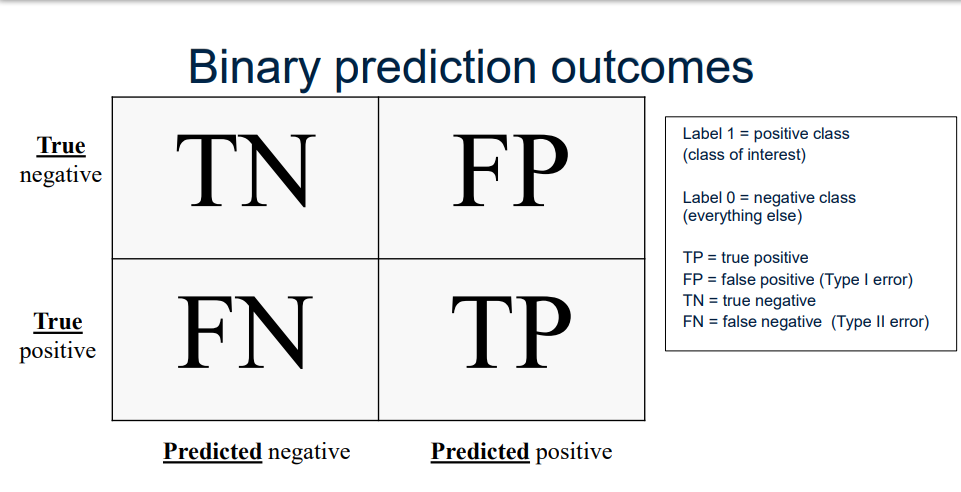

TN 양성예측이 맞음  
TP 음성예측이 맞음   
FP 음성예측이 틀림  
FN 양성예측이 틀림 

정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.

accuracy= TP+TN / TP+TN+ FP+FN

--------------------------------------------------------------------------------------------------------------------------------------

Error Rate = 1- Accuracy 

--------------------------------------------------------------------------------------------------------------------------------------
정밀도   
정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.

precision= TP / TP/TF   
true라고 예측한것중에 TP가 얼마정도인가 (얼마나 정밀하게 예측했나)

--------------------------------------------------------------------------------------------------------------------------------------
재현율  
재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.

recall= TP / TP + FN   
실제 True중에 내가 맞춘게 얼마인가?  의료데이터에서 재현율이 더 중요 ex) 실제 병이 걸린환자중에 내가 예측한 환자가 얼마인가

--------------------------------------------------------------------------------------------------------------------------------------

특이도(Specificity) 실제 Negative를 얼마나 잘 예측하는지를 나타내는 지표 , eg. 환자가 아닌 사람을 환자가 아니다라고 얼마나 잘 예측하지는 보여주는 척도   TN / FP + TN

--------------------------------------------------------------------------------------------------------------------------------------

F점수  
정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.

F1=2⋅precision⋅recall/(precision+recall) = 2*TP / 2*TP + FP + FP 

F𝛽 = (1+ 𝛽2) * Precision * Recall / (𝛽2 * Precision) + Recall =  (1+𝛽2)*TP / (1+𝛽2) + TP + B * FN + FP
𝛽 allows adjustment of the metric to control the emphasis on recall vs precision: 
• Precision-oriented users: 𝜷 = 0.5 (false positives hurt performance more than false negatives)
• Recall-oriented users: 𝜷 = 2 (false negatives hurt performance more than false positives)  

 

Accuracy는 편향의 함정에 빠질 수 있습니다. 무엇을 뜻하냐면 만일 단일 모델이 실제로 긍정인 것만 예측을 잘하고 부정인 것은 예측을 잘하지 못한다면 좋은 모델이라고 할 수 있을까요?

단편적으로 Accuracy만 봤을 때 좋은 값이 도출될 수 있지만 실제로 부정인 것은 예측을 잘 못하기 때문에 좋은 모델이라고 선언하기는 힘듭니다.

이러한 결과가 도출되는 것은 데이터가 불균형(imbalanced)하기 때문에 벌어지는 상황인데요. 이렇게 데이터가 불균형하다면 측정할 수 있는 방법은 없을까요?

있습니다. 바로 F1 Score로 측정하는 것인데요.  Accuracy를 평가 척도로 사용한다면 균형(Balanced) 데이터에서 사용


F1 Score는 보통 불균형 분류문제에서 평가척도로 주로 사용됩니다. 데이터가 불균형한 상태에서 Accuracy로 성능을 평가하기엔 데이터 편향성이 너무 크게 나타나 올바르게 성능을 측정하기 힘들게 됩니다. 그렇기 때문에 F1 Score를 평가척도로 사용합니다.

그렇다면 왜 불균형 데이터 상태에서는 F1 Score를 이용할까요?
Sensitivity와 Precision을 이용하여 조화평균을 구하여 평가 척도를 구성했기 때문
 
두개 값의 크기가 서로 다른 형태를 나타내고 있는 불균형 상태이지만 이를 조화평균 함으로써 큰 값의 크기에 대한 가중치를 낮추고 작은 값에 더 맞춰주는 과정을 거쳐서 불균형 데이터일지라도 값의 크기 차이가 어느정도 상쇄되기 때문에 F1 Score는 불균형 데이터에서의 주요 척도로써 사용되고 있습니다.

따라서 아무리 input class가 Positive에 맞춰져 있어 모델이 긍정에 대한 예측이 강한 분류기로 만들어질지라도 F1 Score로 평가 척도를 구해서 올바르게 분류가 되었는지 성능을 측정할 수 있습니다.

#### Binary (two-class) confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[357  50]
 [ 40   3]]


In [10]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [13]:
# 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [14]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.88      0.89       407
           1       0.06      0.07      0.06        43

    accuracy                           0.80       450
   macro avg       0.48      0.47      0.48       450
weighted avg       0.82      0.80      0.81       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Decision tree
               precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       

### Decision functions

Decision Functions (decision_function)
- Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large-magnitude positive values) or the negative class (large-magnitude negative values).
- Choosing a fixed decision threshold gives a classification rule.
- By sweeping the decision threshold through the entire range of possible score values, we get a series of classification outcomes that form a curve

 애매한 값을 이분법으로 확실히 분류를 할 기준이 필요로 합니다. 이 기준을 바로 임계값(Threshold)라고 합니다. 로지스틱 회귀 값을 이진 카테고리에 매핑(Mapping)하려면 분류 임계값(Classification Threshold, 결정 임계값이라고도 함)을 정의해야 합니다.  분류 임계값은 항상 0.5여야 한다고 생각하기 쉽지만 임계값은 문제에 따라 달라지므로 값을 조정해야 합니다.
 
Typical rule: choose most likely class
– e.g class 1 if threshold > 0.50.
 
Adjusting threshold affects predictions of classifier.Higher threshold results in a more conservative classifier
e.g. only predict Class 1 if estimated probability of class 1 is above 70% 
This increases precision. Doesn't predict class 1 as often, but when it 
does, it gets high proportion of class 1 instances correct.

Not all models provide realistic probability estimates


### Precision-recall and ROC curves

**ROC curves**  It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0

The ROC curve is a useful tool for a few reasons:

The curves of different models can be compared directly in general or for different thresholds.
The area under the curve (AUC) can be used as a summary of the model skill.
The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


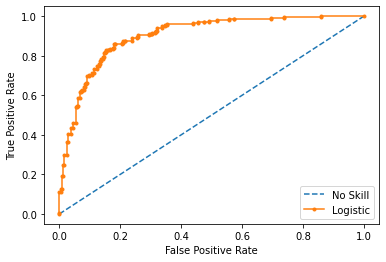

In [15]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Precision-Recall Curves** There are many ways to evaluate the skill of a prediction model.

An approach in the related field of information retrieval (finding documents based on queries) measures precision and recall.
These measures are also useful in applied machine learning for evaluating binary classification models.

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

Logistic: f1=0.841 auc=0.898


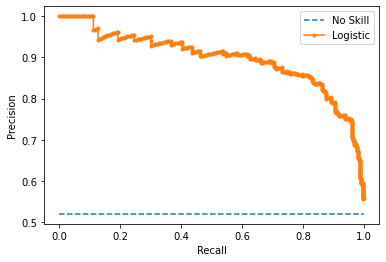

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()


# show the plot
pyplot.show()

### Multi-Class Evaluation

Multi-class evaluation is an extension of the binary case.  
– A collection of true vs predicted binary outcomes, one per class  
– Confusion matrices are especially useful  
– Classification report  
• Overall evaluation metrics are averages across classes  
– But there are different ways to average multi-class results: we will cover   
these shortly.  
– The support (number of instances) for each class is important to consider,   
e.g. in case of imbalanced classes  
• Multi-label classification: each instance can have multiple labels   
(not covered here  

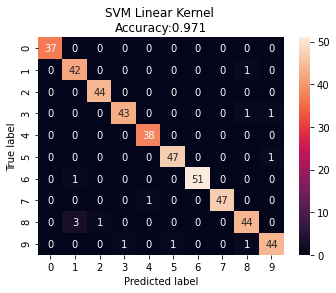

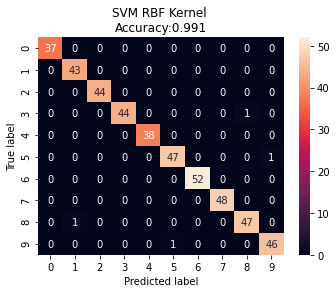

In [21]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Muti-class classification report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mc , svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Macro Average
중요한 점은 각 클래스들이 똑같은 가중치를 가진다는 것 

In [26]:
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Macro-averaged precision = 0.99 (treat classes equally)
Macro-averaged f1 = 0.99 (treat classes equally)


#### Micro Average
데이터 결과의 각 인스턴스에 같은 가중치를 준다.

In [27]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))

Micro-averaged precision = 0.99 (treat instances equally)
Micro-averaged f1 = 0.99 (treat instances equally)


If the classes have about the same number of instances,   
macro- and micro-average will be about the same.  
• If some classes are much larger (more instances) than others,   
and you want to:  
– Weight your metric toward the largest ones, use micro-averaging.  
– Weight your metric toward the smallest ones, use macro-averaging.  
• If the micro-average is much lower than the macro-average   
then examine the larger classes for poor metric performance.  
• If the macro-average is much lower than the micro-average  
then examine the smaller classes for poor metric performance. 

### Regression Evaluation

Typically r2_score is enough  
– Reminder: computes how well future instances will be predicted  
– Best possible score is 1.0   
– Constant prediction score is 0.0  
• Alternative metrics include:  
– mean_absolute_error (absolute difference of target & predicted values) 목표와 예측값 사이의 절대차 평균을 측정 (L1 norm 기대값에 대응)  
– mean_squared_error (squared difference of target & predicted values) 목표와 예측값 사이의 차를 제곱한 평균을 측정(L2 norm 법칙의 기대값에 대응)  
– median_absolute_error (robust to outliers) 특이치를 무시하는것이 중요할 경우 사용 , 평균보다 오류 분포의 중간값을 사용하기 때문에 특이치에 robust하다.

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


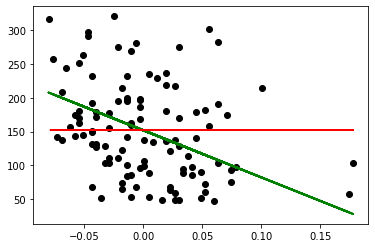

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# mean_squared_error는 평균 제곱 오차 회귀 손실하는 함수로 흔히
#mean_squared_error( y_true , y_pred , sample_weight = None , multioutput = 'uniform_average' , squared = True ) 사용
#y_true : 목표값 설정, y_pred : 예상 목표값, sample_weight : 가중치, raw_value, 
#'raw_values' :다중 출력 입력의 경우 전체 오류 세트를 리턴합니다. 'uniform_average' : 모든 출력의 오차를 평균 무게로 평균화

 #r2_score는 R ^ 2 (결정 계수) 회귀 점수 함수로 최상의 점수는 1.0이며 음수가 될 수 있습니다
#r2_score( y_true , y_pred , sample_weight = None , multioutput = 'uniform_average' )이렇게 사용합니다
#y_ture : 올바른 목표 값. , y_pred : 예상 목표 값. , sample_weight : 샘플 무게

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()